# Modelo de Classificação de Depressão em Áreas Rurais

- Dataset para o desenvolvemento pego na plataforma [Kaggle](https://www.kaggle.com/datasets/diegobabativa/depression).


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.linear_model import LinearRegression
# %matplotlib inline


# Lendo o Dataset

In [3]:

URL = 'https://gist.githubusercontent.com/Ronildo22/a8983b7543c364534c75d6add6fc8413/raw/767bec26dbf90a2467380aba7d6f71a0820bc37e/depressionDataset'
df_depressao = pd.read_csv(URL)

df_depressao.shape


(1429, 23)

## Renomeando o cabeçalho do Dataframe

In [4]:

rename_df = {
            'Survey_id': 'id_pesquisa',
            'Ville_id': 'id_cidade',
            'sex': 'genero',
            'Age': 'idade',
            'Married': 'casado',
            'Number_children': 'numero_filhos',
            'education_level': 'nivel_educacao',
            'total_members': 'membros_familia',
            'gained_asset': 'ativos_adquiridos',
            'durable_asset': 'ativos_duraveis',
            'save_asset': 'ativos_poupados',
            'living_expenses': 'despesas_moradia',
            'other_expenses': 'outras_despesas',
            'incoming_salary': 'renda_salario',
            'incoming_own_farm': 'renda_fazenda_propria',
            'incoming_business': 'renda_negocios',
            'incoming_no_business': 'renda_sem_negocio',
            'incoming_agricultural': 'renda_agricola',
            'farm_expenses': 'despesas_fazenda',
            'labor_primary': 'trabalho_principal',
            'lasting_investment': 'investimento_duradouro',
            'no_lasting_investmen': 'sem_investimento_duradouro',
            'depressed': 'depressao'
            }

df_depressao.rename(columns=rename_df, inplace=True)
df_depressao.columns


Index(['id_pesquisa', 'id_cidade', 'genero', 'idade', 'casado',
       'numero_filhos', 'nivel_educacao', 'membros_familia',
       'ativos_adquiridos', 'ativos_duraveis', 'ativos_poupados',
       'despesas_moradia', 'outras_despesas', 'renda_salario',
       'renda_fazenda_propria', 'renda_negocios', 'renda_sem_negocio',
       'renda_agricola', 'despesas_fazenda', 'trabalho_principal',
       'investimento_duradouro', 'sem_investimento_duradouro', 'depressao'],
      dtype='object')

## Removendo Colunas Desnecessarias

In [5]:

df_depressao.drop(['id_pesquisa', 'id_cidade'], axis=1, inplace=True)

df_depressao.columns


Index(['genero', 'idade', 'casado', 'numero_filhos', 'nivel_educacao',
       'membros_familia', 'ativos_adquiridos', 'ativos_duraveis',
       'ativos_poupados', 'despesas_moradia', 'outras_despesas',
       'renda_salario', 'renda_fazenda_propria', 'renda_negocios',
       'renda_sem_negocio', 'renda_agricola', 'despesas_fazenda',
       'trabalho_principal', 'investimento_duradouro',
       'sem_investimento_duradouro', 'depressao'],
      dtype='object')

## Removendo Valores Vazios do Dataframe

In [6]:
df_depressao = df_depressao.dropna()

df_depressao.count()

genero                        1409
idade                         1409
casado                        1409
numero_filhos                 1409
nivel_educacao                1409
membros_familia               1409
ativos_adquiridos             1409
ativos_duraveis               1409
ativos_poupados               1409
despesas_moradia              1409
outras_despesas               1409
renda_salario                 1409
renda_fazenda_propria         1409
renda_negocios                1409
renda_sem_negocio             1409
renda_agricola                1409
despesas_fazenda              1409
trabalho_principal            1409
investimento_duradouro        1409
sem_investimento_duradouro    1409
depressao                     1409
dtype: int64

## Removendo Dados Enviesados do Dataframe


In [7]:
df_depressao['depressao'].value_counts()
# depressao
# 0    1174
# 1     235

# 939

linhas_a_serem_removidas = df_depressao[df_depressao['depressao'] == 0].head(939)
df_depressao.drop(linhas_a_serem_removidas.index, inplace=True)

df_depressao['depressao'].value_counts()


depressao
1    235
0    235
Name: count, dtype: int64

# Preparando Dados

## Separando o rotulo y dos dados x

In [8]:

df_depressao.head()

y = df_depressao['depressao']

df_depressao.drop(['depressao'], axis=1, inplace=True)



y = np.array(y)

In [9]:

df_depressao

scaler = StandardScaler()
x = scaler.fit_transform(df_depressao)


# 232

# Treinando o modelo

## Metricas do modelo com seed = 30

(470, 20)
(470,)


Acurácia: 0.58
Precisão: 0.57
Recall: 0.64
AUC: 0.60


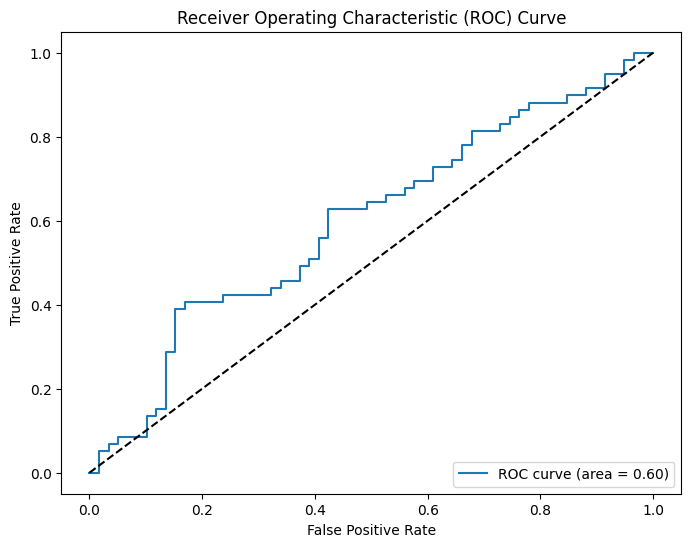

In [19]:
seed = 30

print(x.shape)
print(y.shape)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, stratify=y, random_state=seed)

# Criando o modelo de regressão linear
model = LinearRegression()

# Treinando o modelo com os dados de treino
model.fit(x_train, y_train)

# Fazendo previsões com os dados de teste
pred = model.predict(x_test)


threshold = 0.5
pred_binary = np.where(pred >= threshold, 1, 0)  # Aplicar o limiar para transformar em binário

# Calculando e exibindo as métricas após a binarização das previsões
accuracy = accuracy_score(y_test, pred_binary)
precision = precision_score(y_test, pred_binary)
recall = recall_score(y_test, pred_binary)
auc = roc_auc_score(y_test, pred)  # AUC usando as previsões contínuas

print(f'Acurácia: {accuracy:.2f}')
print(f'Precisão: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'AUC: {auc:.2f}')

# Curva ROC após a binarização das previsões
fpr, tpr, thresholds = roc_curve(y_test, pred)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')  # Linha diagonal
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


# scaler = MinMaxScaler(feature_range=(0, 1))
# pred_scaled = scaler.fit_transform(pred.reshape(-1, 1))

# print(pred_scaled)

# print(y_test)


# acuracia = accuracy_score(y_test, pred_scaled)


# recall = recall_score(y_test, pred)
# recall = recall * 100

# precisao = precision_score(y_test, pred)
# precisao = precisao * 100

# f1 = f1_score(y_test, pred)
# f1 = f1 * 100

# mae = mean_absolute_error(y_test, pred)
# mae = mae * 100

# mse = mean_squared_error(y_test, pred)
# mse = mse * 100

# rmse = np.sqrt(mse)
# rmse 


# print('========== Metricas do modelo ==========')
# print(f'Acuracia: {acuracia:.0f}%')
# print(f'Recall: {recall:.0f}%')
# print(f'Precisao: {precisao:.2f}%')
# print(f'F1-score: {f1:.2f}%')
# print(f"Erro Absoluto Médio (MAE): {mae:.0f}%",)
# print(f"Erro Quadrático Médio (MSE): {mse:.0f}%")
# print(f"Raiz do Erro Quadrático Médio (RMSE): {rmse:.2f}")

# # Plotando os dados e a linha de regressão
# plt.scatter(x, y, color='blue', label='Dados reais')
# plt.plot(x, model.predict(x), color='red', label='Regressão Linear')
# plt.xlabel('Variável independente')
# plt.ylabel('Variável dependente')
# plt.legend()
# plt.title('Regressão Linear em Python')
# plt.show()